In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [4]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
conv_base.trainable = False

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Material/Sem5/AI/Research/TLT/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Material/Sem5/AI/Research/TLT/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 5536 files belonging to 2 classes.
Found 2373 files belonging to 2 classes.


In [10]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
173/173 [==============================] - 218s 1s/step - loss: 0.5431 - accuracy: 0.7489 - val_loss: 0.4290 - val_accuracy: 0.7901
Epoch 2/10
173/173 [==============================] - 216s 1s/step - loss: 0.3828 - accuracy: 0.8306 - val_loss: 0.4322 - val_accuracy: 0.8036
Epoch 3/10
173/173 [==============================] - 216s 1s/step - loss: 0.3173 - accuracy: 0.8676 - val_loss: 0.4168 - val_accuracy: 0.8158
Epoch 4/10
173/173 [==============================] - 218s 1s/step - loss: 0.2931 - accuracy: 0.8748 - val_loss: 0.4049 - val_accuracy: 0.8205
Epoch 5/10
173/173 [==============================] - 232s 1s/step - loss: 0.2389 - accuracy: 0.9090 - val_loss: 0.4518 - val_accuracy: 0.8007
Epoch 6/10
173/173 [==============================] - 233s 1s/step - loss: 0.2187 - accuracy: 0.9115 - val_loss: 0.4286 - val_accuracy: 0.8226
Epoch 7/10
173/173 [==============================] - 233s 1s/step - loss: 0.1755 - accuracy: 0.9361 - val_loss: 0.5038 - val_accuracy: 0.7927

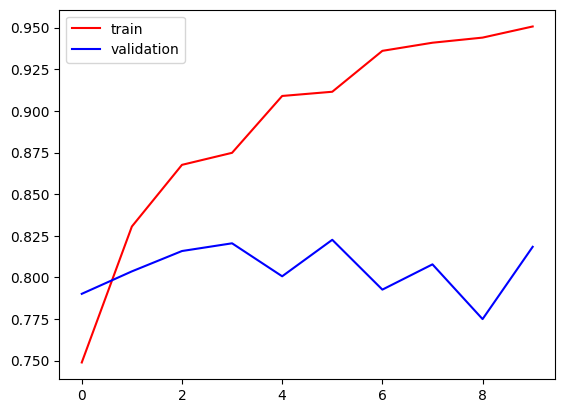

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

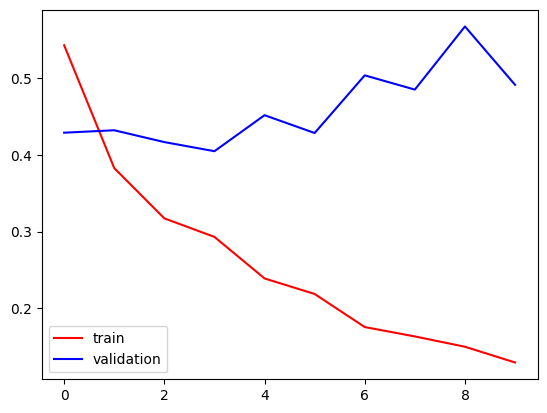

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
model.save('1TL')

INFO:tensorflow:Assets written to: 1TL\assets


INFO:tensorflow:Assets written to: 1TL\assets
